WebScraping de uma página simples, com notícias.

Motivação: capturar dados semi-estruturados, e armazená-los em formato estruturado.

Website:

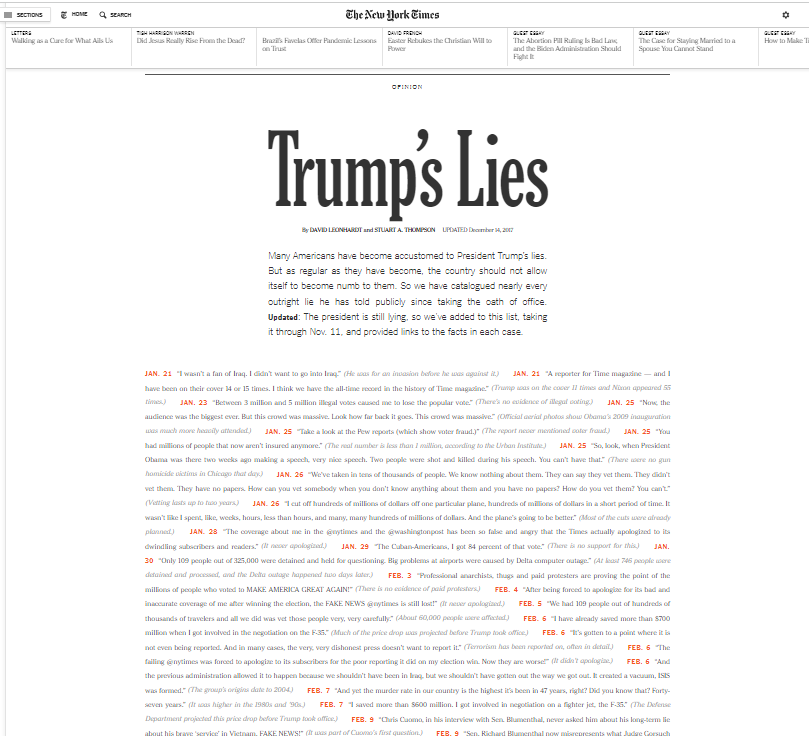

In [ ]:
#carregando bibliotecas
library(tidyverse)
library(stringr)
library(XML)
library(lubridate)
library(rvest)
library(readr)

In [10]:
#lendo webside

website = read_html(x = 'https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html')

In [11]:
# verificando tags

node1 = website %>% html_nodes(".short-desc")

node1

{xml_nodeset (180)}
 [1] <span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Ira ...
 [2] <span class="short-desc"><strong>Jan. 21 </strong>“A reporter for Time m ...
 [3] <span class="short-desc"><strong>Jan. 23 </strong>“Between 3 million and ...
 [4] <span class="short-desc"><strong>Jan. 25 </strong>“Now, the audience was ...
 [5] <span class="short-desc"><strong>Jan. 25 </strong>“Take a look at the Pe ...
 [6] <span class="short-desc"><strong>Jan. 25 </strong>“You had millions of p ...
 [7] <span class="short-desc"><strong>Jan. 25 </strong>“So, look, when Presid ...
 [8] <span class="short-desc"><strong>Jan. 26 </strong>“We've taken in tens o ...
 [9] <span class="short-desc"><strong>Jan. 26 </strong>“I cut off hundreds of ...
[10] <span class="short-desc"><strong>Jan. 28 </strong>“The coverage about me ...
[11] <span class="short-desc"><strong>Jan. 29 </strong>“The Cuban-Americans,  ...
[12] <span class="short-desc"><strong>Jan. 30 </strong>“Only 109 people out o 

In [16]:
# Extraindo datas

head(node1 %>% html_nodes("strong") %>% html_text(trim = T))

[1] "Jan. 21" "Jan. 21" "Jan. 23" "Jan. 25" "Jan. 25" "Jan. 25"

In [15]:
# Extraindo mentiras

head(node1 %>% html_text(trim = T))

[1] "Jan. 21 “I wasn't a fan of Iraq. I didn't want to go into Iraq.” (He was for an invasion before he was against it.)"                                                                                                        
[2] "Jan. 21 “A reporter for Time magazine — and I have been on their cover 14 or 15 times. I think we have the all-time record in the history of Time magazine.” (Trump was on the cover 11 times and Nixon appeared 55 times.)"
[3] "Jan. 23 “Between 3 million and 5 million illegal votes caused me to lose the popular vote.” (There's no evidence of illegal voting.)"                                                                                       
[4] "Jan. 25 “Now, the audience was the biggest ever. But this crowd was massive. Look how far back it goes. This crowd was massive.” (Official aerial photos show Obama's 2009 inauguration was much more heavily attended.)"   
[5] "Jan. 25 “Take a look at the Pew reports (which show voter fraud.)” (The report never mentioned voter fraud.)"                                                                                                               
[6] "Jan. 25 “You had millions of people that now aren't insured anymore.” (The real number is less than 1 million, according to the Urban Institute.)"

In [17]:
# Extraindo link da fonte

head(node1 %>% html_nodes("a") %>% html_attr("href"))

[1] "https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the"  
[2] "http://nation.time.com/2013/11/06/10-things-you-didnt-know-about-time/"                                
[3] "https://www.nytimes.com/2017/01/23/us/politics/donald-trump-congress-democrats.html"                   
[4] "https://www.nytimes.com/2017/01/21/us/politics/trump-white-house-briefing-inauguration-crowd-size.html"
[5] "https://www.nytimes.com/2017/01/24/us/politics/unauthorized-immigrant-voting-trump-lie.html"           
[6] "https://www.nytimes.com/2017/03/13/us/politics/fact-check-trump-obamacare-health-care.html"

Agora, realizar a extração completa dos dados, e organizar e estruturar em formato tabular.

In [20]:
# Criando estrutura de dados para armazenar informações

dados = vector('list', length = length(node1))

tail(dados)

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

In [31]:
# Criando loop para extração dos dadsos

for(i in seq_along(node1)){
    
    #extraindo data
    data = str_c(node1[i] %>%
                 html_nodes('strong') %>%
                 html_text(trim = T), ", 2017") %>% mdy()
    
    #extraindo mentira
    mentira = str_sub(str_split(html_text(node1[i], trim = T), pattern =  "\\(")[[1]][1], 10, -3)
    
    #extraindo url-fonte
    url = node1[i] %>%
    html_nodes("a") %>%
    html_attr("href")
    
    # Alimentando de dados
    dados[[i]] = data.frame(data = data,
                           mentira = mentira,
                           url = url)
    
    
}

Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”
Warning message:
“All formats failed to parse. No formats found.”


In [33]:
# Visualizando dados
df = bind_rows(dados)

head(df)

,data,mentira,url
,<date>,<chr>,<chr>
1,2017-01-21,I wasn't a fan of Iraq. I didn't want to go into Iraq.,https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the
2,2017-01-21,A reporter for Time magazine — and I have been on their cover 14 or 15 times. I think we have the all-time record in the history of Time magazine.,http://nation.time.com/2013/11/06/10-things-you-didnt-know-about-time/
3,2017-01-23,Between 3 million and 5 million illegal votes caused me to lose the popular vote.,https://www.nytimes.com/2017/01/23/us/politics/donald-trump-congress-democrats.html
4,2017-01-25,"Now, the audience was the biggest ever. But this crowd was massive. Look how far back it goes. This crowd was massive.",https://www.nytimes.com/2017/01/21/us/politics/trump-white-house-briefing-inauguration-crowd-size.html
5,2017-01-25,Take a look at the Pew report,https://www.nytimes.com/2017/01/24/us/politics/unauthorized-immigrant-voting-trump-lie.html
6,2017-01-25,You had millions of people that now aren't insured anymore.,https://www.nytimes.com/2017/03/13/us/politics/fact-check-trump-obamacare-health-care.html


In [ ]:
# Exportando dados

write_csv(df, "df_lies.csv")